# https://www.youtube.com/watch?v=Ok4hFfWQDZE

In [7]:
from skyfield.api import Star, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt
ts = load.timescale()

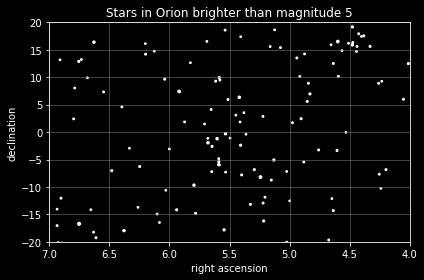

In [12]:
plt.style.use(['dark_background'])
plt.title(f'Stars in Orion brighter than magnitude 5')
plt.xlabel('right ascension')
plt.ylabel('declination')
plt.xlim(7.0, 4.0)
plt.ylim(-20, 20)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.tight_layout()

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

eph = load('de421.bsp')
earth = eph['earth']
df_lim = df[df['magnitude'] <= 5.0]
bright_stars = Star.from_dataframe(df_lim)
astrometric = earth.at(ts.now()).observe(bright_stars)
ra, dec, distance = astrometric.radec()
plt.scatter(ra.hours, dec.degrees, 8-df_lim['magnitude'], 'w')